#**Part_one: Data Wrangling**

In [ ]:
# For numerical operations
import numpy as np
# For data manipulation and analysis
import pandas as pd
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount ('/content/data.csv')

Drive already mounted at /content/data.csv; to attempt to forcibly remount, call drive.mount("/content/data.csv", force_remount=True).


##**Data Loading**

Use Pandas to read CSV, Excel, or other file formats.

In [ ]:
#Load a CSV file
df_car = pd.read_csv('/content/data.csv/MyDrive/car_dataset.csv')

#**1. Analysing DataFrame**




In [ ]:
# first - Clear summary of the data in the DataFrame
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
# watching the first rows of the dataset/dataframe
df_car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
# list of column names
df_car.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
# controling of column data-types
df_car.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


In [ ]:
# return all unique values in each column
df_car.nunique()

,0
Make,48
Model,915
Year,28
Engine Fuel Type,10
Engine HP,359
Engine Cylinders,10
Transmission Type,5
Driven_Wheels,4
Number of Doors,3
Market Category,72


In [ ]:
# numbers of rows & columns
df_car.shape

(11914, 16)

In [ ]:
# descriptive statistics for all numerical columns
df_car.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
# display of missing values
df_car.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


In [ ]:
# number of duplicates
df_car.duplicated().sum()

715

In [ ]:
# close examination of the duplicates
df_car[df_car.duplicated(keep=False)]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
17,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,Volvo,XC60,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Midsize,4dr SUV,30,23,870,40950
11707,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,22,15,481,29149
11708,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,22,15,481,29149
11709,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,front wheel drive,4.0,Crossover,Midsize,4dr SUV,22,16,481,27499


# **2. Data Cleaning**

##**1. Handling Missing Data**

In [ ]:
# Remove column - Market Category
  # Option 1: The market category column has (round about 31,4 %) missing values, as categorization and meaningful analyses and conclusions are not possible
  #           df_car = df_car.drop(columns=['Market Category'])

  # Option 2: Missing values Convert missing values to unknown
df_car['Market Category'] = df_car['Market Category'].fillna('unknown')

In [ ]:
# Checks df_car for missing values (NaN)
df_car[df_car.isna().any(axis=1)]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,36620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,unknown,Compact,Wagon,92,120,1720,31950
9854,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,unknown,Compact,Wagon,92,120,1720,35950
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,unknown,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,unknown,Midsize,Sedan,25,17,481,20199


In [ ]:
# intermediate control missing values "Number of doors"
df_car[df_car['Number of Doors'].isna()]


# according to internet information, the Tesla S models from 2016 have 4(5) doors
# according to internet information, the Ferrari models from 2013 have 2(3) doors

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
6930,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,105,102,1391,79500
6931,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,101,98,1391,66000
6932,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,High-Performance",Large,Sedan,105,92,1391,134500
6933,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,rear wheel drive,NaN,"Exotic,Performance",Large,Sedan,100,97,1391,74500
6934,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,107,101,1391,71000


In [ ]:
# missing falues for Tesla and Ferraris about the Number of doors changing
df_car.loc[df_car['Number of Doors'].isna() & (df_car['Make'] == 'Tesla'), 'Number of Doors'] = 4.0
df_car.loc[df_car['Number of Doors'].isna() & (df_car['Make'] == 'Ferrari'), 'Number of Doors'] = 2.0

In [ ]:
# intermediate control from the columns 'Engine Fuel Type'
df_car[df_car['Engine Fuel Type'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,unknown,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,unknown,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,unknown,Midsize,Sedan,25,17,481,18499


In [ ]:
# The missing values in the “Engine fuel type” column are changed to the type 'regular unleaded' after internet research
df_car['Engine Fuel Type'] = df_car['Engine Fuel Type'].fillna('regular unleaded')

In [ ]:
# intermediate control from the columns 'Engine Cylinders'
df_car[df_car['Engine Cylinders'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,36620
3716,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,33450
3717,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35445
3718,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,28995
3719,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35595
5778,Mitsubishi,i-MiEV,2014,electric,NaN,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,126,436,22995
5779,Mitsubishi,i-MiEV,2016,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,126,436,22995
5780,Mitsubishi,i-MiEV,2017,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,102,121,436,22995
8373,Toyota,RAV4 EV,2012,electric,154.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Crossover,Midsize,4dr SUV,74,78,2031,49800


In [ ]:
# Step 1 missing values in 'Engine Cylinder' by 'Engine Fuel Type: electic' = 0.0
df_car.loc[df_car['Engine Fuel Type'] == 'electric', 'Engine Cylinders'] = df_car['Engine Cylinders'].fillna(0.0)

In [ ]:
# control step - missing values in column 'Engine Cylinders'
df_car[df_car['Engine Cylinders'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
8695,Mazda,RX-7,1993,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23,15,586,7523
8696,Mazda,RX-7,1994,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23,15,586,8147
8697,Mazda,RX-7,1995,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23,15,586,8839
8698,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,31930
8699,Mazda,RX-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,26435
8700,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,27860
8701,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,31000
8702,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,26435
8703,Mazda,RX-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,31700
8704,Mazda,RX-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,28560


In [ ]:
# Step 2 the remaining missing values are all from the “Mazda” brand and all have so-called wobbly engines with 2 cylinders (internet research bild till Year 2011)
df_car.loc[df_car['Make'] == 'Mazda', 'Engine Cylinders'] = df_car['Engine Cylinders'].fillna(2.0)

In [ ]:
# control - datas - filterd by Make 'Mazda'
df_car[df_car['Make'] == 'Mazda']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
112,Mazda,2,2012,regular unleaded,100.0,4.0,MANUAL,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,35,29,586,16020
113,Mazda,2,2012,regular unleaded,100.0,4.0,MANUAL,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,35,29,586,14530
114,Mazda,2,2012,regular unleaded,100.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,34,28,586,16860
115,Mazda,2,2012,regular unleaded,100.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,34,28,586,15370
116,Mazda,2,2013,regular unleaded,100.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,34,28,586,17050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10841,Mazda,Truck,2003,regular unleaded,135.0,4.0,MANUAL,rear wheel drive,2.0,unknown,Compact,Regular Cab Pickup,26,21,586,13930
10842,Mazda,Truck,2003,regular unleaded,207.0,6.0,MANUAL,rear wheel drive,4.0,unknown,Compact,Extended Cab Pickup,20,15,586,20880
10843,Mazda,Truck,2003,regular unleaded,147.0,6.0,MANUAL,rear wheel drive,2.0,unknown,Compact,Extended Cab Pickup,21,17,586,18885
10844,Mazda,Truck,2003,regular unleaded,135.0,4.0,MANUAL,rear wheel drive,2.0,unknown,Compact,Extended Cab Pickup,26,21,586,18050


In [ ]:
# intermediate control from the columns 'Engine HP'
df_car[df_car['Engine HP'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Large,Sedan,27,18,61,62915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,unknown,Compact,Wagon,92,120,1720,35700
9851,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,unknown,Compact,Wagon,92,120,1720,33700
9852,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,unknown,Compact,Wagon,92,120,1720,33950
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,unknown,Compact,Wagon,92,120,1720,31950


In [ ]:
# Calculate Average of 'Engine HP' grouped by 'Engine Cylinders'
group_AVG_Cylinder_HP = df_car.groupby('Engine Cylinders')['Engine HP'].transform('mean').round(1)
group_AVG_Cylinder_HP.unique()

array([ 261.1,  172.8,  193.2,  366.7,  548.8,  145.3,  578.1,   74.9,
        228.4, 1001. ])

In [ ]:
# Replace missing values in 'Engine HP' with the group average
df_car['Engine HP'] = df_car['Engine HP'].fillna(group_AVG_Cylinder_HP)

In [ ]:
#control view
df_car.isnull().sum()
df_car

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


##**1.1. Handling duplicates**

In [ ]:
# Remove duplicates
df_car_unique = df_car.drop_duplicates(keep='first')

# controll-step
# df_car_unique OR
df_car_unique.duplicated().sum()

0

##**2. Conversino DataTypes**

In [ ]:
# Ensure that columns are of the correct data type for analysis / colum year int to float

# After checking the individual columns and their file types, I have decided that no file types need to be adjusted.

##**3. Filter data set**

In [ ]:
# Filter the dataset to only include cars from the year 1995 and later.

df_car_filt = df_car_unique[(df_car_unique['Year']) >= 1995]
df_car_filt

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


##**4. String operations**

In [ ]:
# Standardize text entries by converting these columns' entries to lowercase: Vehicle Style & Market Category
df_car_filt.loc[:, 'Vehicle Style'] = df_car_filt['Vehicle Style'].str.lower()
df_car_filt.loc[:, 'Market Category'] = df_car_filt['Market Category'].str.lower()

df_car_filt

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"factory tuner,luxury,high-performance",Compact,coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,performance",Compact,convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,high-performance",Compact,coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,performance",Compact,coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,luxury,Compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"crossover,hatchback,luxury",Midsize,4dr hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"crossover,hatchback,luxury",Midsize,4dr hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"crossover,hatchback,luxury",Midsize,4dr hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"crossover,hatchback,luxury",Midsize,4dr hatchback,23,16,204,50920


In [ ]:
# Re-save dataframe
df_car_new = df_car_filt
df_car_new

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"factory tuner,luxury,high-performance",Compact,coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,performance",Compact,convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,high-performance",Compact,coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,performance",Compact,coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,luxury,Compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"crossover,hatchback,luxury",Midsize,4dr hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"crossover,hatchback,luxury",Midsize,4dr hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"crossover,hatchback,luxury",Midsize,4dr hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"crossover,hatchback,luxury",Midsize,4dr hatchback,23,16,204,50920


#**2. Feature Engineering**


##**1. Create New Columns:**



In [ ]:
# Make a real copy of df_car
df_car_1995 = df_car[df_car['Year'] >= 1995].copy()
df_car_1995

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
# Create a column called Total MPG that is the average of city mpg and highway MPG
df_car_1995.loc[:,'Total MPG'] = (df_car_1995['city mpg'] + df_car_1995['highway MPG']) / 2

# total average
df_car_1995.loc[:,'Total MPG Total'] = (df_car['city mpg'] + df_car['highway MPG']).mean()

df_car_1995

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Total MPG,Total MPG Total
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,22.5,46.37074
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,23.5,46.37074
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,24.0,46.37074
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,23.0,46.37074
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,23.0,46.37074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120,19.5,46.37074
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670,19.5,46.37074
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620,19.5,46.37074
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920,19.5,46.37074


In [ ]:
# Create a column called Price per HP calculated as: MSRP / Engine HP.
df_car_1995.loc['Price per HP'] = round((df_car_1995['MSRP'] / df_car_1995['Engine HP']),2)

In [ ]:
df_car_1995

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Total MPG,Total MPG Total
0,BMW,1 Series M,2011.0,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26.0,19.0,3916.0,46135.0,22.5,46.37074
1,BMW,1 Series,2011.0,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28.0,19.0,3916.0,40650.0,23.5,46.37074
2,BMW,1 Series,2011.0,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28.0,20.0,3916.0,36350.0,24.0,46.37074
3,BMW,1 Series,2011.0,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28.0,18.0,3916.0,29450.0,23.0,46.37074
4,BMW,1 Series,2011.0,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28.0,18.0,3916.0,34500.0,23.0,46.37074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11910,Acura,ZDX,2012.0,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23.0,16.0,204.0,56670.0,19.5,46.37074
11911,Acura,ZDX,2012.0,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23.0,16.0,204.0,50620.0,19.5,46.37074
11912,Acura,ZDX,2013.0,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23.0,16.0,204.0,50920.0,19.5,46.37074
11913,Lincoln,Zephyr,2006.0,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26.0,17.0,61.0,28995.0,21.5,46.37074


#**3. Exploratory Data Analysis (EDA)**


##**1. Descriptive Statistics**



In [ ]:
# Calculate summary statistic "mean"  for the columns Engine HP, MSRP, Popularity, highway MPG, city mpg
df_car_new[['Engine HP', 'MSRP', 'Popularity', 'highway MPG', 'city mpg']].mean().round(2)


,0
Engine HP,258.59
MSRP,44159.01
Popularity,1575.33
highway MPG,26.75
city mpg,19.83


In [ ]:
# Calculate summary statistic "median" for the columns Engine HP, MSRP, Popularity, highway MPG, city mpg
df_car_new[['Engine HP', 'MSRP', 'Popularity', 'highway MPG', 'city mpg']].median().round(2)

,0
Engine HP,240.0
MSRP,31630.0
Popularity,1385.0
highway MPG,26.0
city mpg,18.0


In [ ]:
# Calculate summary statistic "standard deviation" for the columns Engine HP, MSRP, Popularity, highway MPG, city mpg
df_car_new[['Engine HP', 'MSRP', 'Popularity', 'highway MPG', 'city mpg']].std().round(2)

,0
Engine HP,109.54
MSRP,62495.07
Popularity,1459.07
highway MPG,9.12
city mpg,9.37


In [ ]:
# summary statistics in one table
statistics_summary = pd.DataFrame({
    'mean': df_car_new[['Engine HP', 'MSRP', 'Popularity', 'highway MPG', 'city mpg']].mean().round(2),
    'median': df_car_new[['Engine HP', 'MSRP', 'Popularity', 'highway MPG', 'city mpg']].median().round(2),
    'standard deviation': df_car_new[['Engine HP', 'MSRP', 'Popularity', 'highway MPG', 'city mpg']].std().round(2)
})

statistics_summary

,mean,median,standard deviation
Engine HP,258.59,240.0,109.54
MSRP,44159.01,31630.0,62495.07
Popularity,1575.33,1385.0,1459.07
highway MPG,26.75,26.0,9.12
city mpg,19.83,18.0,9.37


##**2. Group Analysis**


In [ ]:
# Group the data by the following columns and calculate the average MSRP and Popularity for each group: Driven_Wheels , Vehicle Size , Engine Cylinders
# Option 1 - all at once
df_car_new.groupby(['Driven_Wheels', 'Vehicle Size', 'Engine Cylinders'])[['MSRP', 'Popularity']].mean().round(2)

MSRP  Popularity
Driven_Wheels     Vehicle Size Engine Cylinders                        
all wheel drive   Compact      4.0                 30687.34     1276.32
                               5.0                 41291.67     1615.00
                               6.0                 72580.94     1442.27
                               8.0                 99476.92     3497.62
                               10.0               205888.92     2052.57
                               12.0               469718.18     1158.00
                               16.0              1757223.67      820.00
                  Large        0.0                 90636.36     1391.00
                               4.0                 51826.17     1241.20
                               6.0                 49240.30     2217.15
                               8.0                 98260.72     1701.63
                               12.0               179273.68     1123.42
                  Midsize      4.0                 35721.72     1666.31
                               5.0                 38299.70      870.00
                               6.0                 45358.05     1343.42
                               8.0                 92855.86     1588.09
                               10.0                68340.00      873.00
                               12.0               317891.43      738.74
four wheel drive  Compact      4.0                 17247.82      964.93
                               5.0                 30311.67      618.33
                               6.0                 25930.62     1775.69
                               8.0                 33211.36     2127.21
                  Large        6.0                 37823.58     2281.09
                               8.0                 48343.79     1891.65
                  Midsize      5.0                 36360.00      130.00
                               6.0                 32064.73     1447.07
                               8.0                 57642.93     1021.48
                               12.0               217900.00      617.00
front wheel drive Compact      0.0                 32643.55     1814.34
                               3.0                 13547.00      791.95
                               4.0                 20863.02     1460.26
                               5.0                 24258.11      872.07
                               6.0                 18169.46     1263.49
                  Large        4.0                 38246.96      865.96
                               6.0                 29761.12     1693.84
                               8.0                 44004.74     1198.84
                  Midsize      0.0                 49800.00     2031.00
                               4.0                 26725.78     1386.77
                               5.0                  2113.58      870.00
                               6.0                 30066.93     1328.77
                               8.0                 27553.75      797.50
rear wheel drive  Compact      0.0                 34255.00     2424.57
                               2.0                 28567.17      586.00
                               4.0                 23789.82     1319.59
                               5.0                 26706.67     1106.33
                               6.0                 37220.73     1864.71
                               8.0                117139.32     1497.85
                               10.0               168422.41     1558.19
                               12.0               225992.80     1511.26
                  Large        0.0                 76800.00     1391.00
                               4.0                 44188.45     1863.90
                               6.0                 36701.72     2555.79
                               8.0                 56819.85     1699.88
                               12.0               340381.88      380.97
                  Midsi

In [ ]:
# Option 2 filter by 'Driven_Wheels' and after groupby by the groups Driven_Wheels , Vehicle Size , Engine Cylinders
# individually

# return of the unique values of the column Driven_Wheels
df_car_new['Driven_Wheels'].unique()

array(['rear wheel drive', 'all wheel drive', 'front wheel drive',
       'four wheel drive'], dtype=object)

In [ ]:
# Option 2 filter by 'Driven_Wheels'
# fist - 'Driven_Wheels' ['all wheel drive']
df_car_new[df_car_new['Driven_Wheels'] == 'all wheel drive'].groupby(['Driven_Wheels', 'Vehicle Size', 'Engine Cylinders'])[['MSRP', 'Popularity']].mean().round(2)

MSRP  Popularity
Driven_Wheels   Vehicle Size Engine Cylinders                        
all wheel drive Compact      4.0                 30687.34     1276.32
                             5.0                 41291.67     1615.00
                             6.0                 72580.94     1442.27
                             8.0                 99476.92     3497.62
                             10.0               205888.92     2052.57
                             12.0               469718.18     1158.00
                             16.0              1757223.67      820.00
                Large        0.0                 90636.36     1391.00
                             4.0                 51826.17     1241.20
                             6.0                 49240.30     2217.15
                             8.0                 98260.72     1701.63
                             12.0               179273.68     1123.42
                Midsize      4.0                 35721.72     1666.31
                             5.0                 38299.70      870.00
                             6.0                 45358.05     1343.42
                             8.0                 92855.86     1588.09
                             10.0                68340.00      873.00
                             12.0               317891.43      738.74

In [ ]:
# second - 'Driven_Wheels' ['four wheel drive']
df_car_new[df_car_new['Driven_Wheels'] == 'four wheel drive'].groupby(['Driven_Wheels', 'Vehicle Size', 'Engine Cylinders'])[['MSRP', 'Popularity']].mean().round(2)

MSRP  Popularity
Driven_Wheels    Vehicle Size Engine Cylinders                       
four wheel drive Compact      4.0                17247.82      964.93
                              5.0                30311.67      618.33
                              6.0                25930.62     1775.69
                              8.0                33211.36     2127.21
                 Large        6.0                37823.58     2281.09
                              8.0                48343.79     1891.65
                 Midsize      5.0                36360.00      130.00
                              6.0                32064.73     1447.07
                              8.0                57642.93     1021.48
                              12.0              217900.00      617.00

In [ ]:
# third - 'Driven_Wheels' ['front wheel drive']
df_car_new[df_car_new['Driven_Wheels'] == 'front wheel drive'].groupby(['Driven_Wheels', 'Vehicle Size', 'Engine Cylinders'])[['MSRP', 'Popularity']].mean().round(2)

MSRP  Popularity
Driven_Wheels     Vehicle Size Engine Cylinders                      
front wheel drive Compact      0.0               32643.55     1814.34
                               3.0               13547.00      791.95
                               4.0               20863.02     1460.26
                               5.0               24258.11      872.07
                               6.0               18169.46     1263.49
                  Large        4.0               38246.96      865.96
                               6.0               29761.12     1693.84
                               8.0               44004.74     1198.84
                  Midsize      0.0               49800.00     2031.00
                               4.0               26725.78     1386.77
                               5.0                2113.58      870.00
                               6.0               30066.93     1328.77
                               8.0               27553.75      797.50

In [ ]:
# fourth - 'Driven_Wheels' ['rear wheel drive']
df_car_new[df_car_new['Driven_Wheels'] == 'rear wheel drive'].groupby(['Driven_Wheels', 'Vehicle Size', 'Engine Cylinders'])[['MSRP', 'Popularity']].mean().round(2)

MSRP  Popularity
Driven_Wheels    Vehicle Size Engine Cylinders                       
rear wheel drive Compact      0.0                34255.00     2424.57
                              2.0                28567.17      586.00
                              4.0                23789.82     1319.59
                              5.0                26706.67     1106.33
                              6.0                37220.73     1864.71
                              8.0               117139.32     1497.85
                              10.0              168422.41     1558.19
                              12.0              225992.80     1511.26
                 Large        0.0                76800.00     1391.00
                              4.0                44188.45     1863.90
                              6.0                36701.72     2555.79
                              8.0                56819.85     1699.88
                              12.0              340381.88      380.97
                 Midsize      4.0                36440.73     2183.93
                              6.0                34727.85     1596.71
                              8.0                49015.08     2262.38
                              12.0              248680.73      968.14

##**3. Visualizations:**


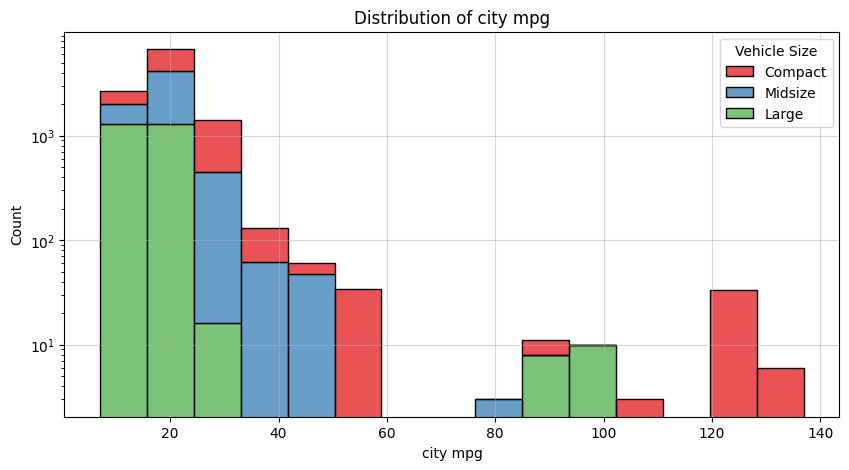

In [ ]:
# A histogram that shows a distribution for the city mpg column.

plt.figure(figsize=(10,5))
#plt.hist(x= df_car_1995['city mpg'], bins=15, color='skyblue', edgecolor='black')
sns.histplot(data=df_car_1995, x='city mpg',bins=15, hue='Vehicle Size', multiple="stack", palette="Set1")
plt.title('Distribution of city mpg')
plt.xlabel('city mpg')
plt.yscale('log')                            # Logarithmic scaling for better visibility
plt.grid(True, alpha=0.5)
plt.show()

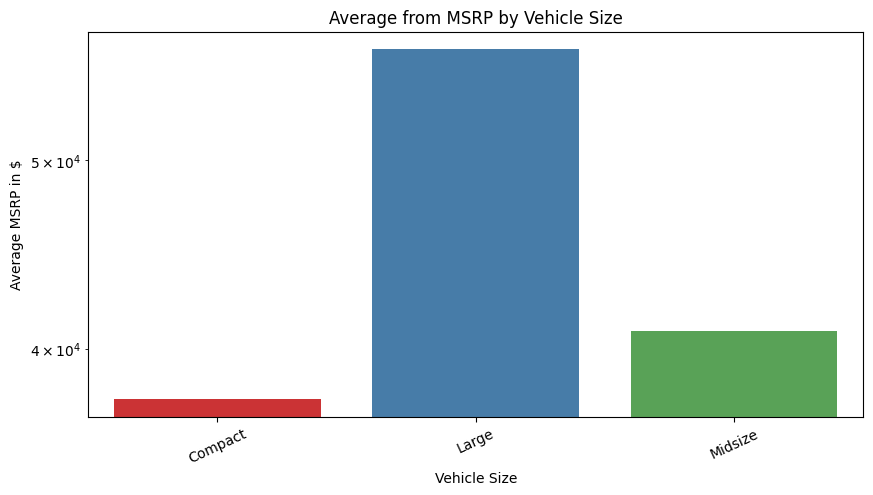

In [ ]:
# A bar chart showing the average MSRP for each category in Vehicle Size

## Group by “Vehicle Size” and calculate average of MSRP
avg_msrp_by_vsize = df_car_1995.groupby('Vehicle Size')['MSRP'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(10,5))
sns.barplot(data=avg_msrp_by_vsize, x='Vehicle Size', y='MSRP', hue='Vehicle Size', palette="Set1", dodge=False, width=0.8)
plt.title('Average from MSRP by Vehicle Size')
plt.xlabel('Vehicle Size')
plt.xticks(rotation=25)                   # Rotates the categories for better readability
plt.ylabel('Average MSRP in $')
plt.yscale('log')                         # Logarithmic scaling for better visibility
plt.grid(axis='y', alpha=0.5)             # Grid lines for the Y-axis only
plt.show()


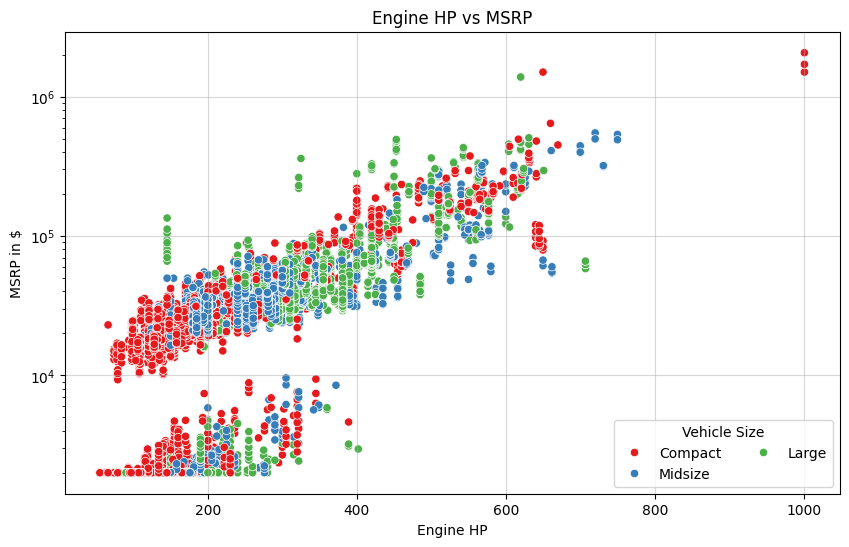

In [ ]:
# A scatter plot showing the relationship between Engine HP and MSRP

plt.figure(figsize=(10, 6))
sns.scatterplot( data=df_car, x='Engine HP', y='MSRP', hue='Vehicle Size', palette="Set1")
plt.title('Engine HP vs MSRP')
plt.xlabel('Engine HP')
plt.ylabel('MSRP in $')
plt.yscale('log')                           # Logarithmic scaling for better visibility
plt.legend(title="Vehicle Size", loc='lower right', ncol=2)
plt.grid(alpha=0.5)

plt.show()

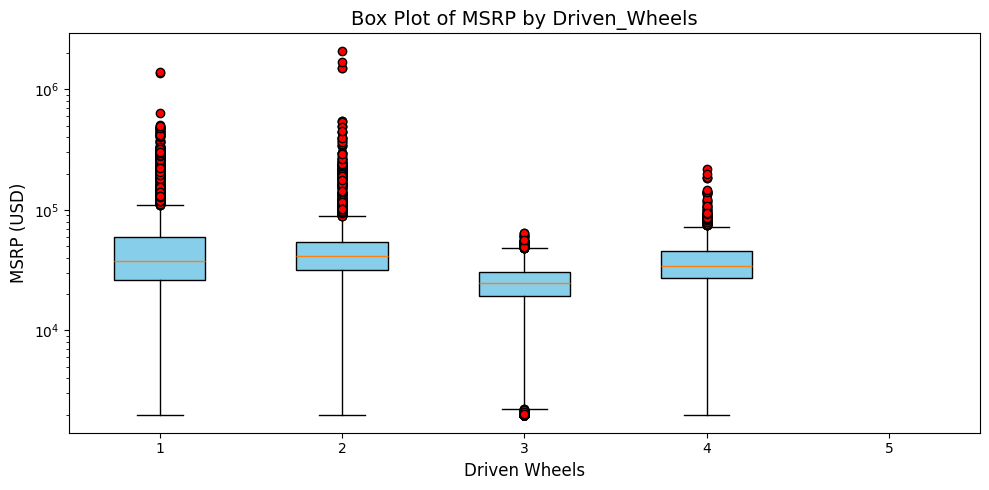

In [ ]:
# A boxplot showing the distribution of MSRP for each category in Driven_Wheels

# Get unique categories in Driven_Wheels
wheels = df_car_1995['Driven_Wheels'].unique().tolist()

# Create data for boxplot
box_data = [df_car_1995[df_car_1995['Driven_Wheels'] == category]['MSRP'] for category in wheels]

# Create figure with a single subplot
plt.figure(figsize=(10, 5))

# Boxplot
plt.boxplot(box_data, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'), flierprops=dict(markerfacecolor='red', marker='o', markersize=6))
plt.title('Box Plot of MSRP by Driven_Wheels', fontsize=14)
plt.xlabel('Driven Wheels', fontsize=12)
plt.ylabel('MSRP (USD)', fontsize=12)
plt.yscale('log')                                 # Logarithmic scaling for better visibility
plt.tight_layout()
plt.show()

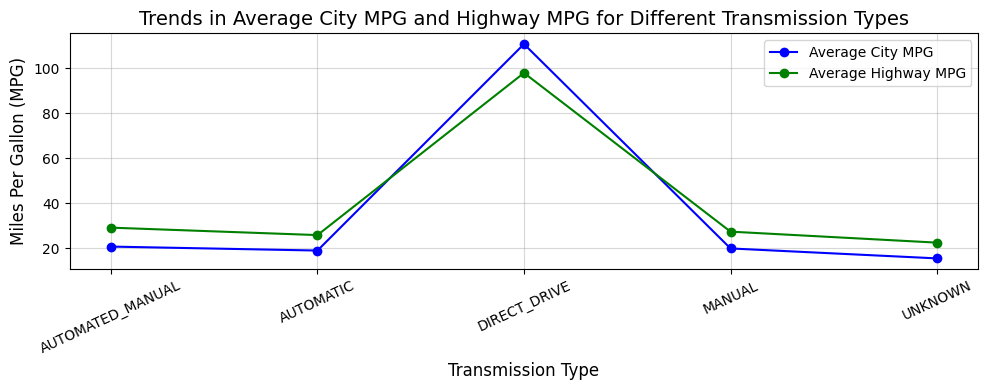

In [ ]:
# A line plot showing trends in average city mpg and highway MPG for different Transmission Type


# 1. Group data by Transmission Type and calculate the mean of city mpg and highway MPG
avg_mpg = df_car_1995.groupby('Transmission Type')[['city mpg', 'highway MPG']].mean()

# 2. Create the plot
plt.figure(figsize=(10, 4))
plt.plot(avg_mpg.index, avg_mpg['city mpg'], marker='o', label='Average City MPG', color='blue')
plt.plot(avg_mpg.index, avg_mpg['highway MPG'], marker='o', label='Average Highway MPG', color='green')
plt.title('Trends in Average City MPG and Highway MPG for Different Transmission Types', fontsize=14)
plt.xlabel('Transmission Type', fontsize=12)
plt.xticks(rotation=25)
plt.ylabel('Miles Per Gallon (MPG)', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

##**4. Correlation Analysis**

In [ ]:
# Correlation Analysis: Investigate the correlation between the following variables:
# Engine HP, MSRP, Popularity, city mpg, and highway MPG

correlation_matrix = df_car_new[['Engine HP', 'MSRP', 'Popularity', 'city mpg', 'highway MPG']].corr()
correlation_matrix.round(2)

,Engine HP,MSRP,Popularity,city mpg,highway MPG
Engine HP,1.00,0.65,0.03,-0.40,-0.41
MSRP,0.65,1.00,-0.06,-0.17,-0.18
Popularity,0.03,-0.06,1.00,-0.00,-0.02
city mpg,-0.40,-0.17,-0.00,1.00,0.89
highway MPG,-0.41,-0.18,-0.02,0.89,1.00


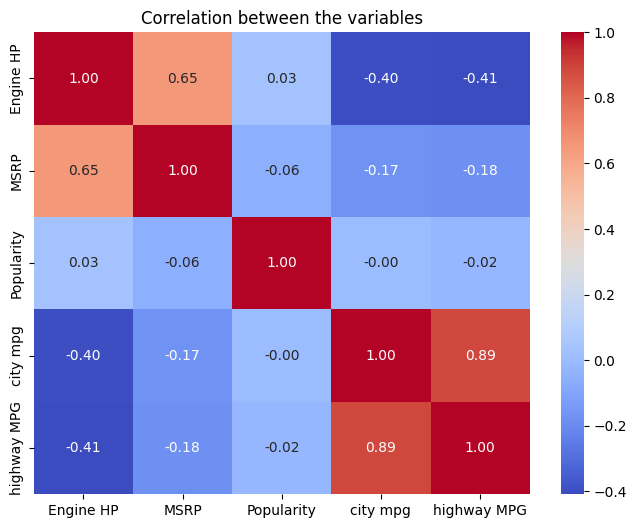

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between the variables')
plt.show()

## ***interpretation of the correlations:***


(1) Engine HP ↔ MSRP (0.65):
Positive correlation

(2) Engine HP ↔ Popularity (0.03):
Very low positive correlation

(3) Engine HP ↔ City MPG (-0.40) and Highway MPG (-0.41):
Negative correlation:

(4) MSRP ↔ Popularity (-0.06):
Very low negative correlation

(5) MSRP ↔ City MPG (-0.17) and Highway MPG (-0.18):
Very low negativ correlation

(6) Popularity ↔ City MPG (-0.00) and Highway MPG (-0.02):
None to very(very) low negative correlation:

(7) City MPG ↔ Highway MPG (0.89):
Very strong positive correlation

#**4. Summary**


##**1. Insights derived from the analysis.**



###*1.1. Descriptive Statistics*

By calculating the mean and median values as well as the standard deviation of the Engine HP, MSRP, Popularity, Highway MPG and City MPG values, the following findings could be derived.

(1) Engine HP: The mean and median are very similar, which indicates that there
    are no extreme outliers in one direction.

(2) MSRP: Here the mean value is many times higher than the median value, which
    means that the data set is skewed, indicating that there are many cheap cars and some cars with a very high MSRP, which raise the mean value considerably.

(3) Popularity: Due to the very high standard deviation compared to the mean
    value, it can be concluded that there are cars with a very low and a very high popularity

(4) Highway MPG: Also have very similar mean and median values, which indicates
    an even distribution of fuel consumption on motorways.

(5) City MPG: Mean and median show a slight difference, indicating that there  
    are cars with significantly better fuel consumption in the city than many other cars.

###*2.1. Group Analysis*

By analysing the data of MSRP, Engine HP, drive type and popularity in groups, the following conclusions can be drawn.

MSRP <-> Engine HP: The more cylinders a car has, the higher the MSRP usually turns out to be. This confirms that powerful engines usually have a higher selling price.

Drive type <-> MSRP: Four-wheel drive cars are generally the most expensive, whereas front-wheel drive cars are usually the cheapest.

Popularity: The popularity of the vehicles varies greatly and usually depends on various other factors (e.g. brand, fuel consumption, ...). However, it can be recognised that 6 and 8 cylinder cars are the most popular on average.

##**2. Patterns or trends identified from visualizations.**

###*2.1. Visualizations*

(1) Histogram
    The histogram shows that compact cars generally have the highest fuel consumption. It can also be seen that the distribution curves are broad, which indicates that there is a wide variation in fuel consumption within each vehicle class.


(2) bar chart
    the bar chart clearly shows that large vehicles are the most expensive and compact vehicles the least expensive in the average MSRP.


(3) A scatter plot showing the relationship between Engine HP and MSRP
    the scatter plot illustrates that there is a clear positive correlation between engine power and MSRP. As a rule, the higher the engine power, the higher the MSRP.


(4) boxplot
    The boxplot shows that the type of drive appears to have an influence on the MSRP. Cars with more driven wheels tend to have a higher MSRP.
    The outliers tend to indicate special vehicle models (e.g. luxury cars such as Ferraris).



(5) line plot
    The graph clearly shows that the transmission type has a significant influence on fuel consumption. Vehicles with direct shift gearboxes are the most efficient, followed by automated manual gearboxes, manual gearboxes and conventional automatic gearboxes.

###*2.2. Correlation Analysis*

(1) Engine HP ↔ MSRP Has a strong positive correlation, which means that the
    higher the engine performance, the higher the MSRP usually is.

(2) Engine HP ↔ Popularity There is a very low, positive correlation here,
    which means that Engine HP has virtually no effect on Popularity.

(3) Engine HP ↔ city mpg and highway MPG There is a medium, negative
    correlation here, which means that cars with a higher Engine HP also consume more fuel on the motorway and in the city

(4) MSRP ↔ Popularity There is a very low, negative correlation here, which
    shows that the MSRP has virtually no influence on the popularity of a car.

(5) MSRP ↔ city mpg and highway MPG The price and fuel consumption in the city
    or on the motorway have a slightly negative correlation, which suggests that expensive cars are less efficient in some cases because they offer greater engine power.

(6) city mpg ↔ highway MPG (0.89):Fuel consumption in the city and on the
    motorway show a very strong, positive correlation, indicating that cars with good fuel economy in the city usually also perform well on the motorway.

#**Concluding Words**

In conclusion, it can be said that the data set offers a wide range of analyses and many insights can be derived, which are still far from being exhausted.